In [1]:
import altair as alt
from vega_datasets import data
import persist_ext as PR

PR.enable('altair')

Loaded PersIst extension version 1.2.0
Extension enabled for altair


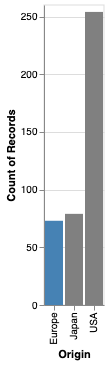

In [2]:
source = data.cars()
brush = alt.selection_point(name="brs", encodings=["x"])

alt.Chart(source, name="sp").mark_bar().encode(
    x='Origin:N',
    y='count()',
    color=alt.condition(brush, alt.value('steelblue'), alt.value('grey')),
).add_params(brush)